In [20]:
%matplotlib inline
import pylab as plt
import jax.numpy as jnp
import seaborn as snb

from scipy.stats import binom as binom_dist
from scipy.stats import beta as beta_dist
from scipy.special import beta as beta_fun
from scipy.special import binom 
import importlib


snb.set_style('darkgrid')
snb.set(font_scale=1.5)
plt.rcParams['lines.linewidth'] = 3


# **Part 1: The beta-binomial model**

Your friend has set up a website for her new business. So far $N = 115$ potential customers have visited her site, but only $y = 4$ customers have completed a purchase. To plan her future investments, she asks you for help to compute the probability that at least one of the next $N^* = 20$ customers will make a purchase.

You decide to model the problem using the beta-binomial model with a uniform prior distribution on the probability of making a purchase $\theta \in [0,1]$:

$$
\theta \sim \text{Beta}(a_0, b_0),
$$

$$
y | \theta \sim \text{Binomial}(N, \theta)
$$

where $a_0 = b_0 = 1$.

### **Task 1.1: Compute the prior mean of $\theta$ and provide a 95%-credibility interval for the prior.**

*Hint:* See Section 4.6.6 in Murphy for details on posterior/credibility intervals. The book discusses intervals for posterior distribution, but we can also use credibility intervals to summarize prior distributions.


Our prior $p(\theta)$ follows the beta distribution, i.e. $p(\theta) = \operatorname$   Since, we know the parameters for the Beta prior, $a_0 = 1, b_0 = 1$, we use the equation for the mean of beta distribution, $\mathbb{E}[\theta]$, given by

$$
\mathbb{E}[\theta] = \frac{a}{a + b}.
$$

Plugging in, we obtain, 

$$
\begin{align*}
\mathbb{E}[\theta] &= \frac{1}{1 + 1}, \\
&= \frac{1}{2}.
\end{align*}
$$


The values of lower and upper credibility intervals are [0.025,0.975] respectively.


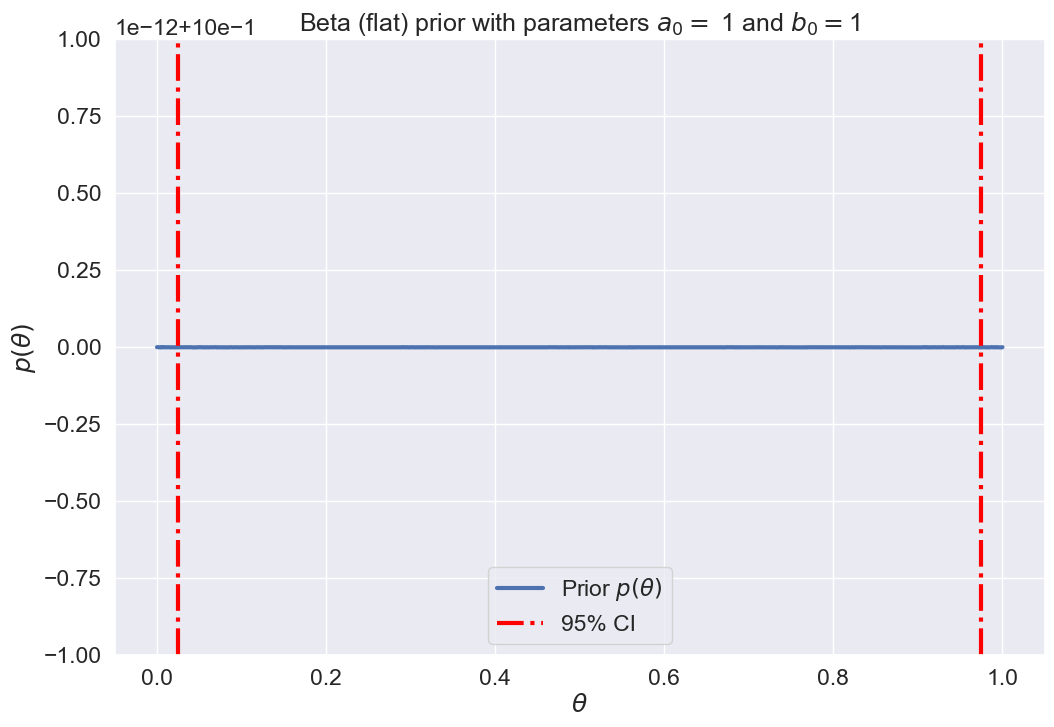

In [22]:
# define the parameters 
N = 115
y = 4
a_0 = 1
b_0 = 1 

# define the grid for plotting of the prior
thetas = jnp.linspace(0, 1, 1000)

# define the prior
beta_prior = beta_dist.pdf(thetas, a_0, b_0)

interval = 0.95

lower_prior, upper_prior = beta_dist.interval(interval, a_0, b_0)

print(f"The values of lower and upper credibility intervals are [{lower_prior:.3f},{upper_prior}] respectively.")

plt.figure(figsize=(12, 8))
plt.plot(thetas, beta_prior, label=r'Prior $p(\theta)$')
plt.axvline(lower_prior, color='red', linestyle='-.', label='95% CI')
plt.axvline(upper_prior, color='red', linestyle='-.')
plt.title(rf'Beta (flat) prior with parameters $a_0 = $ {a_0} and $b_0 =${b_0}')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.legend()
plt.show()


### **Task 1.2: Compute the posterior mean of $\theta$ and provide a 95%-credibility interval for the posterior.**